In [2]:
from sklearn.metrics import log_loss
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from pprint import pprint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,r2_score


In [3]:
insurance_df = pd.read_csv('C:/Users/SHRADDHA/Desktop/train.csv', index_col='Id')
insurance_df.head()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
Id,,,,,,,,,,,,,,,,,,,,,
2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,...,0,0,0,0,0,0,0,0,0,8
5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,...,0,0,0,0,0,0,0,0,0,4
6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,...,0,0,0,0,0,0,0,0,0,8
7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,0.205021,...,0,0,0,0,0,0,0,0,0,8
8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,0.234310,...,0,0,0,0,0,0,0,0,0,8


In [4]:
insurance_df.shape


(59381, 127)

In [5]:
insurance_df['Response'].value_counts()


8    19489
6    11233
7     8027
2     6552
1     6207
5     5432
4     1428
3     1013
Name: Response, dtype: int64

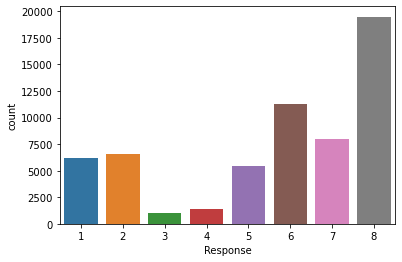

In [6]:
sns.countplot(x=insurance_df['Response']);


# Processing Target Variable


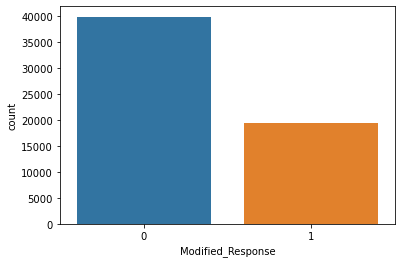

In [7]:
#Combining the Categores to 3 categories
insurance_df['Modified_Response']  = insurance_df['Response'].apply(lambda x : 0 if x<=7 and x>=0 else (1 if x==8 else -1))
sns.countplot(x= insurance_df['Modified_Response']);

# Removing old target variable

In [8]:
# Dropping old response columns
insurance_df.drop('Response',axis = 1, inplace=True)


# Making categorical and numerical columns list
 

In [9]:
# Making lists with categorical and numerical features.
categorical =  [col for col in insurance_df.columns if insurance_df[col].dtype =='object']

numerical = categorical =  [col for col in insurance_df.columns if insurance_df[col].dtype !='object']

# Visualizations On Categorical Features

C:\Users\SHRADDHA\AppData\Local\Temp\ipykernel_40576\4013214888.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(9, 6))


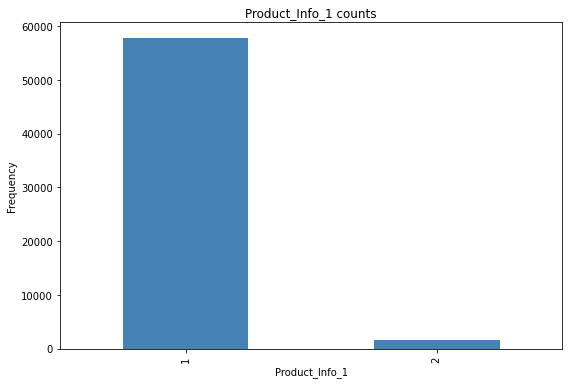

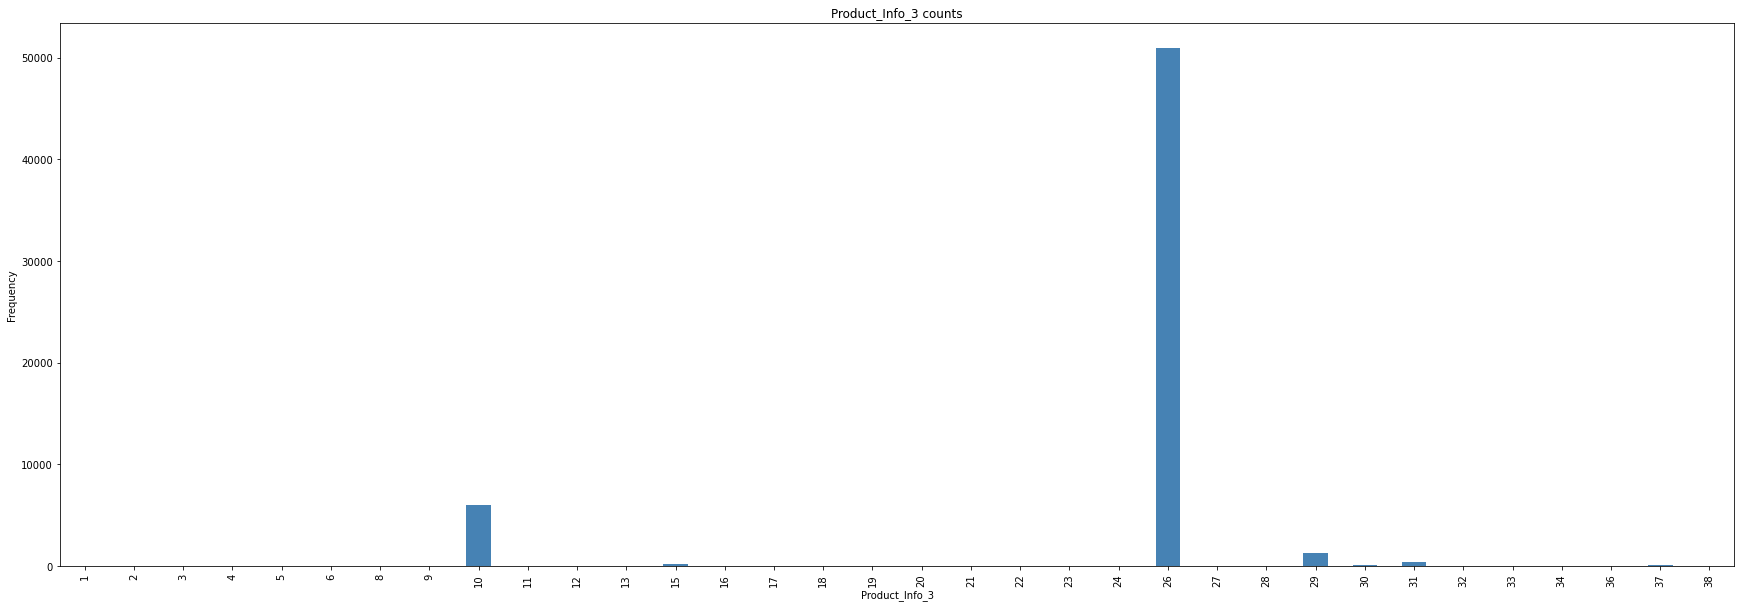

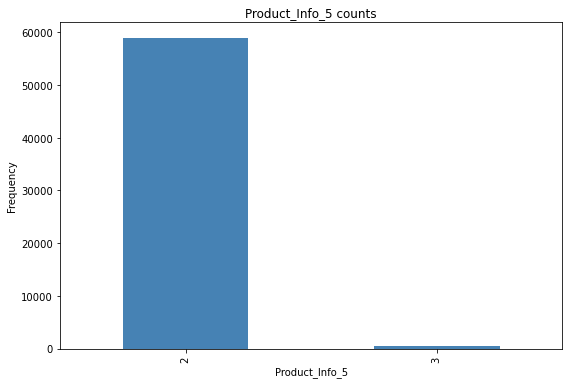

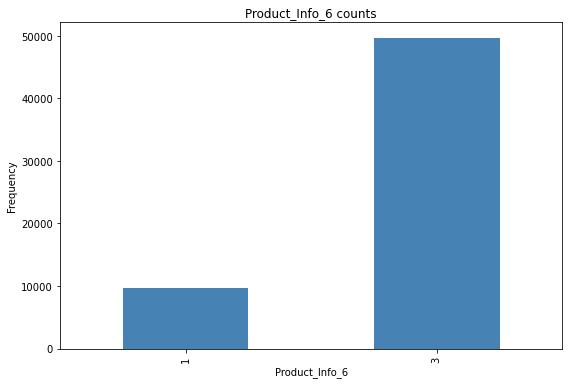

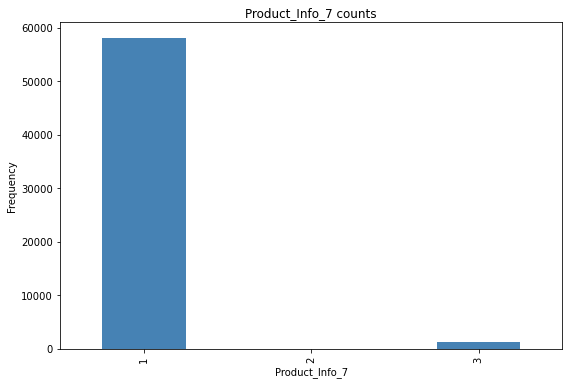

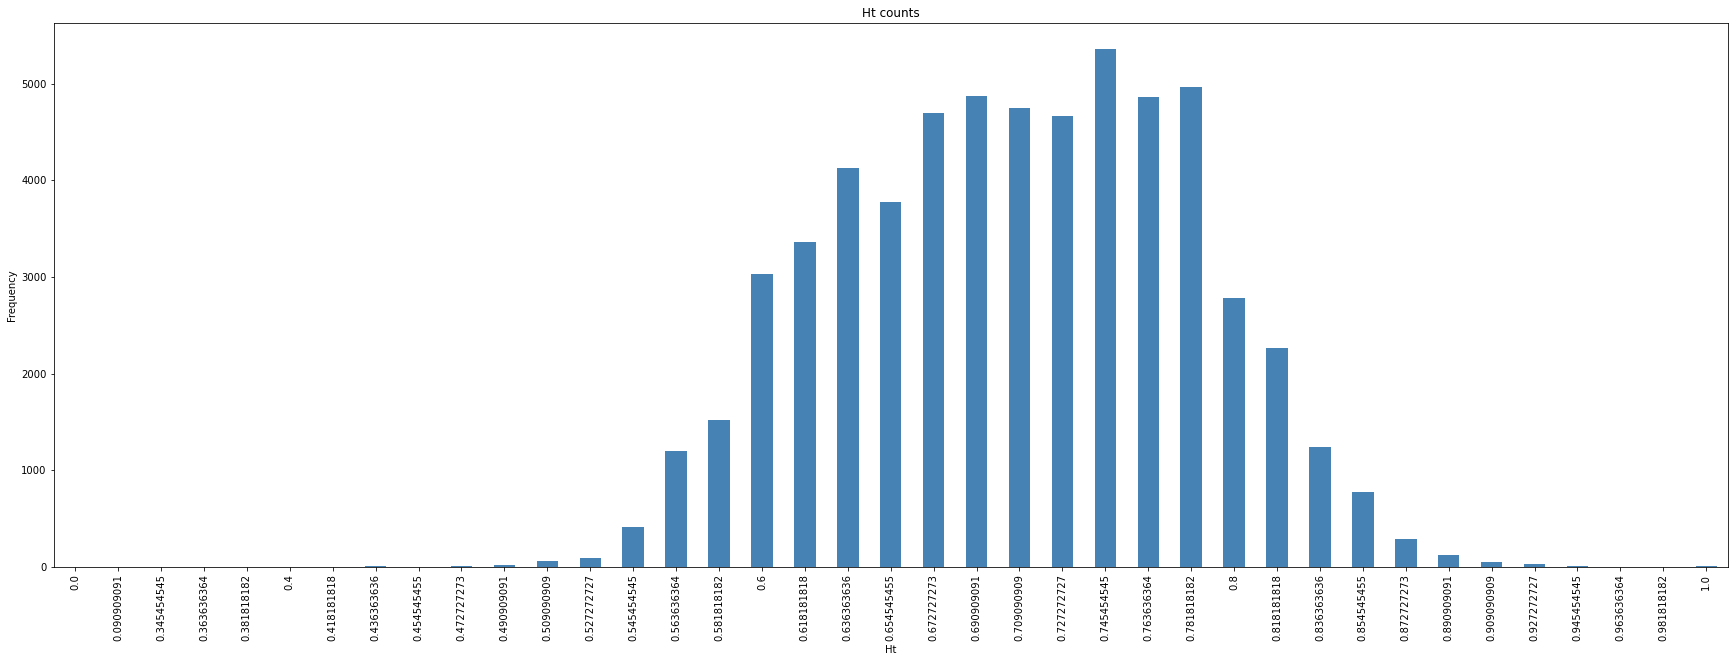

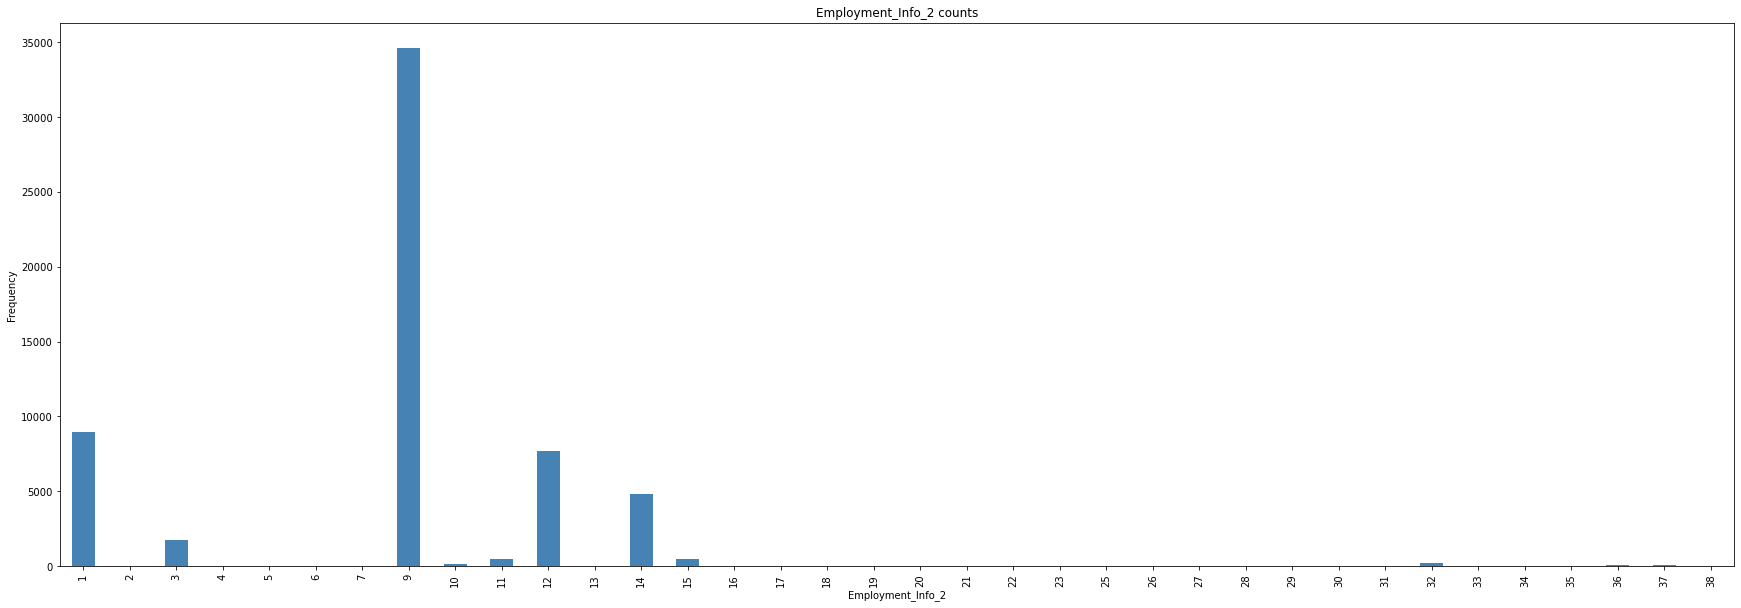

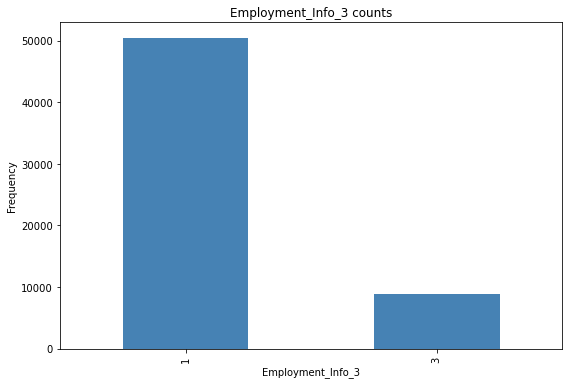

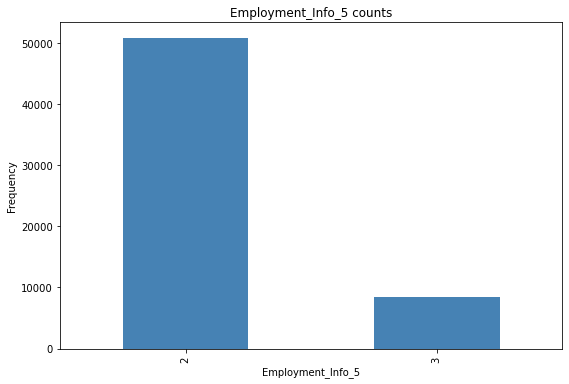

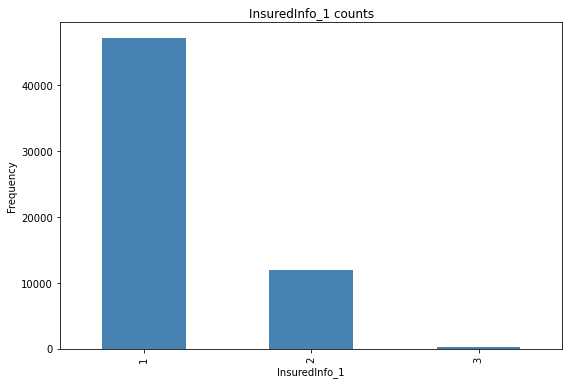

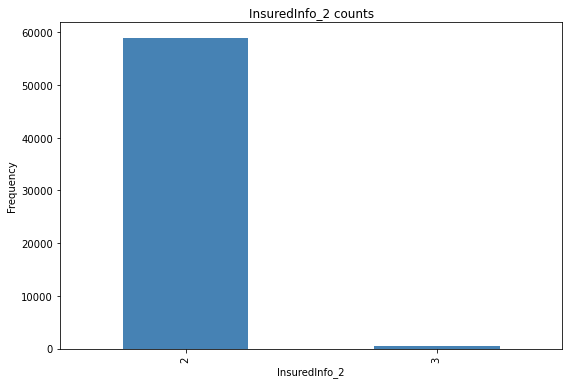

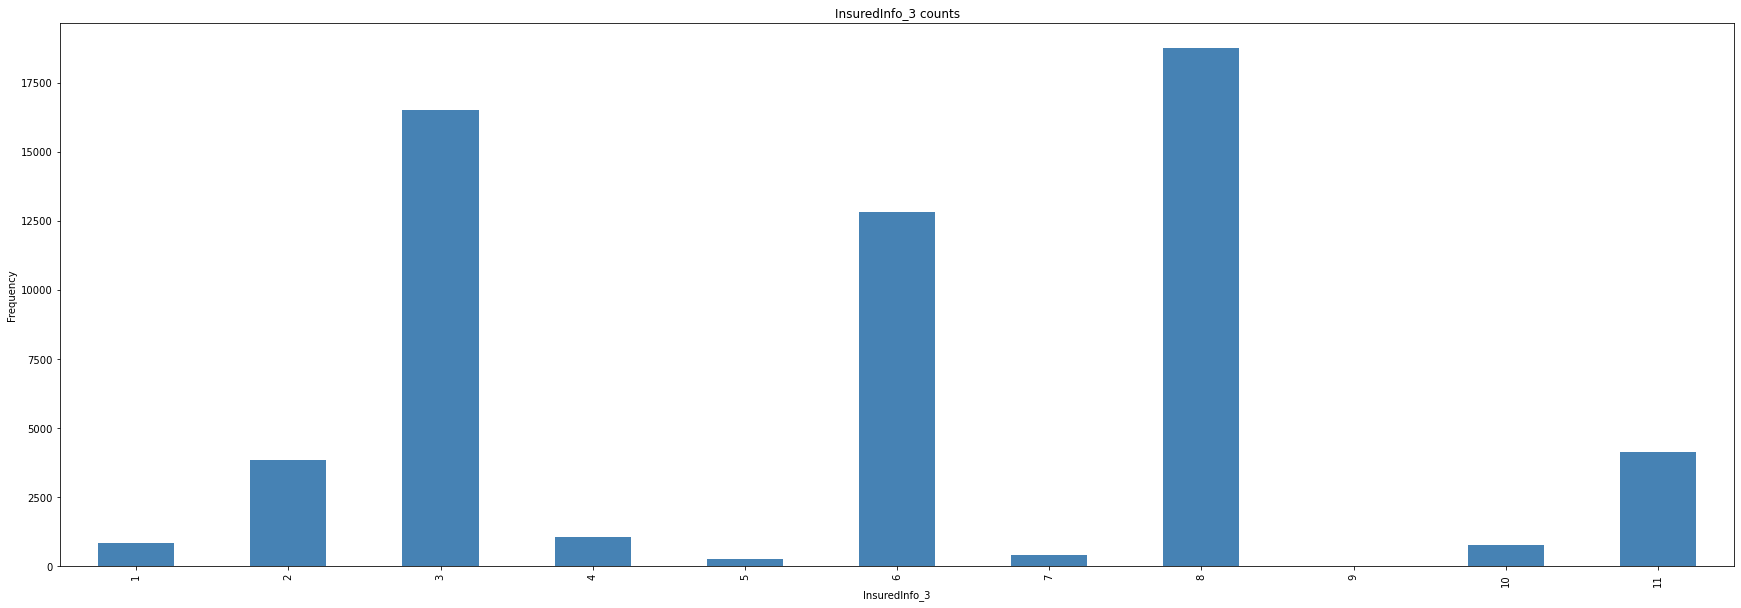

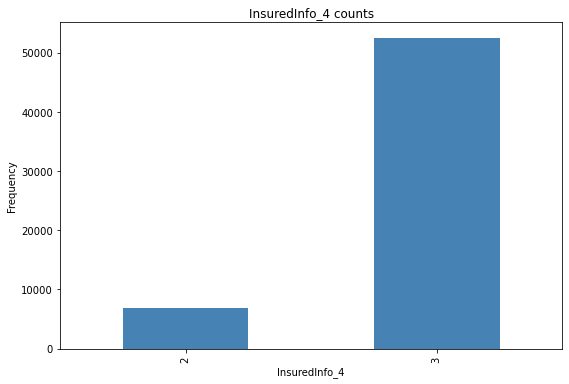

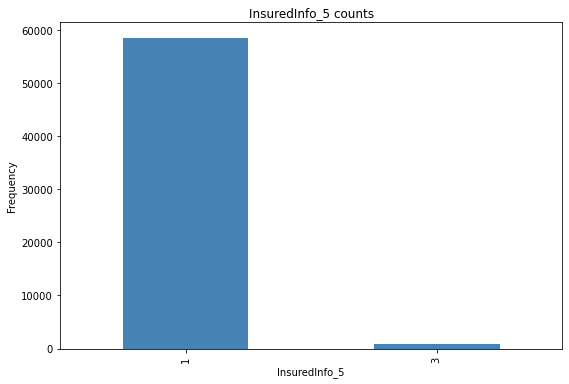

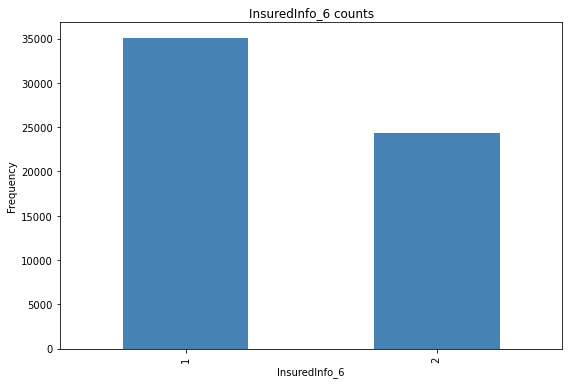

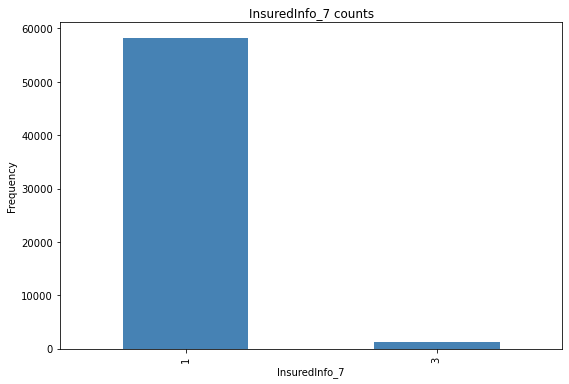

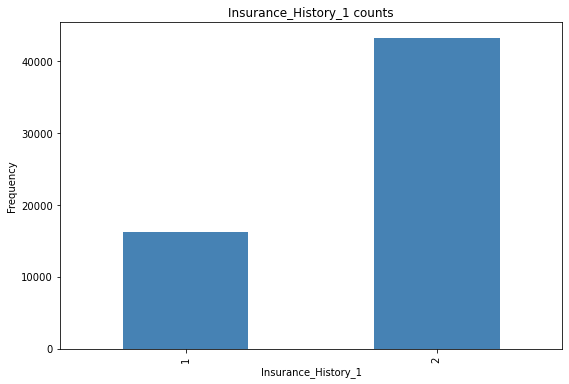

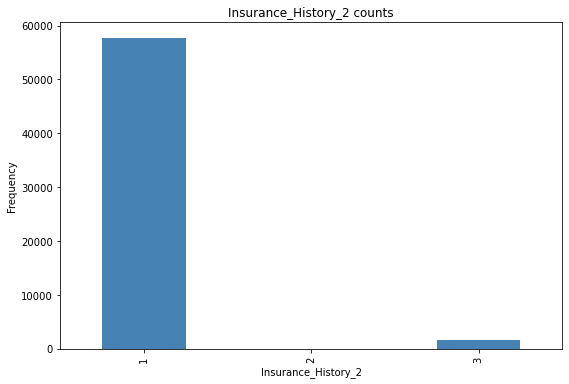

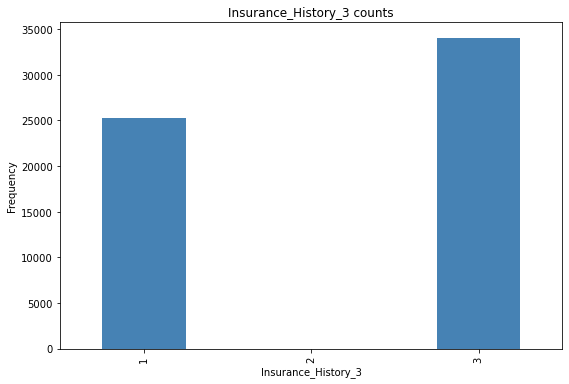

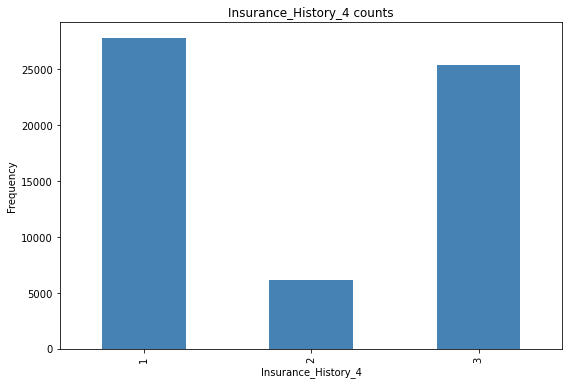

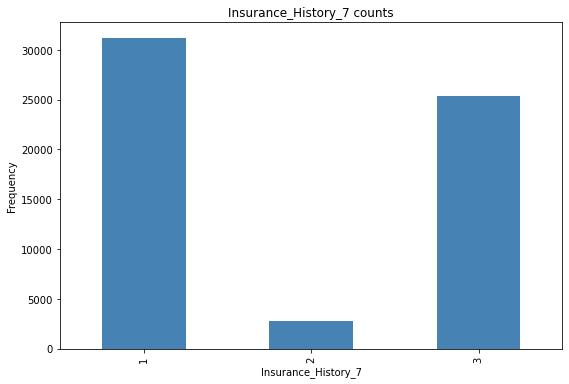

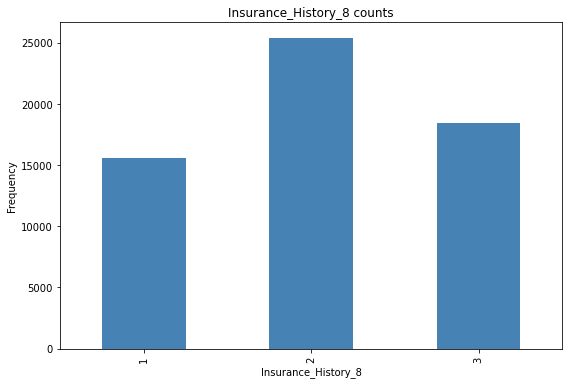

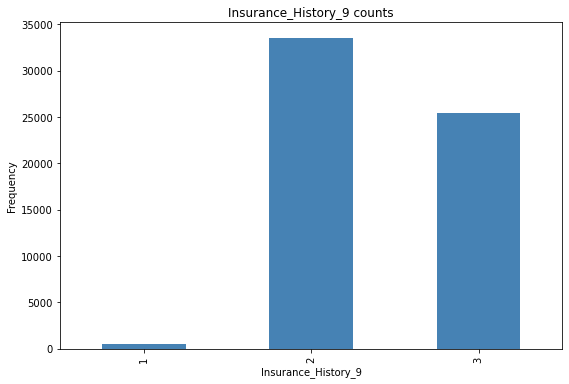

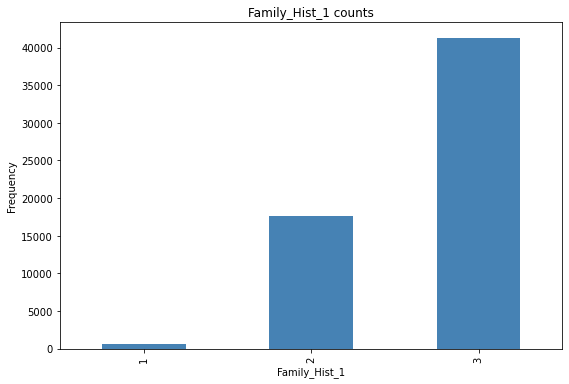

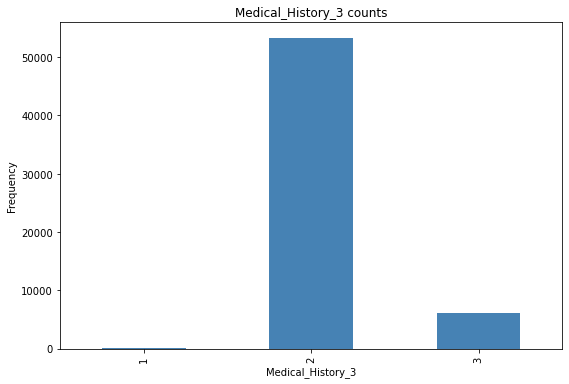

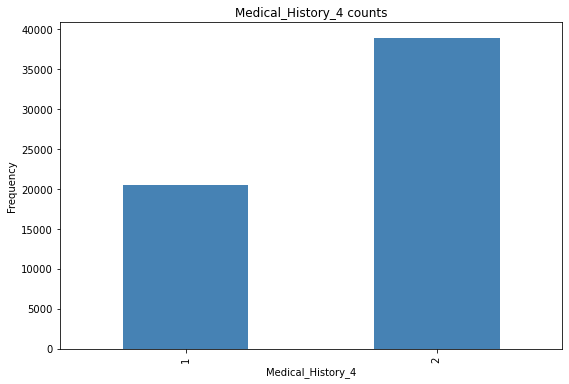

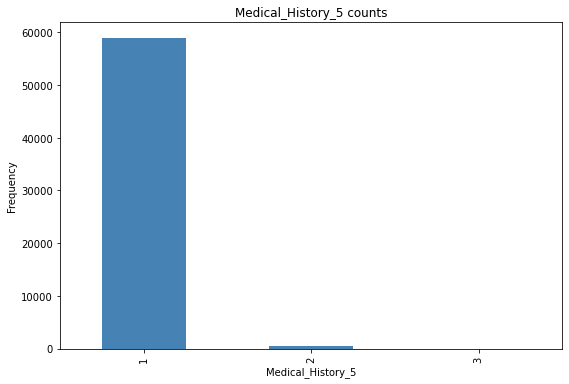

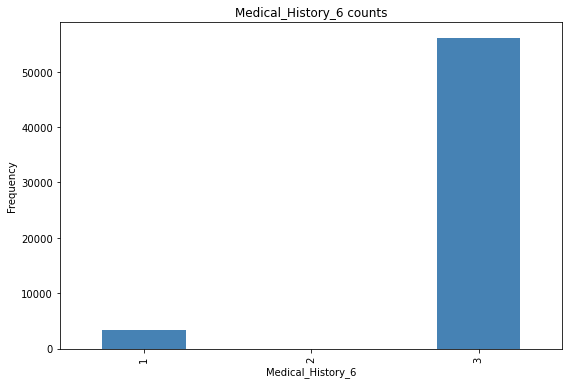

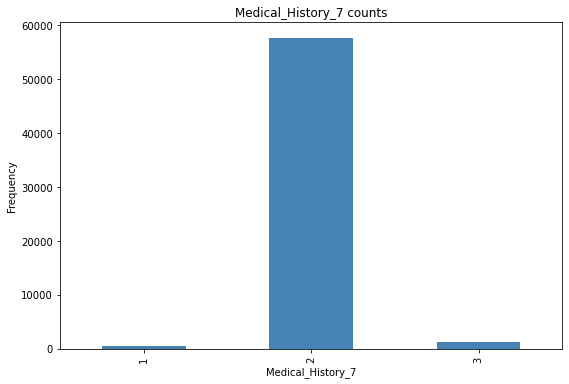

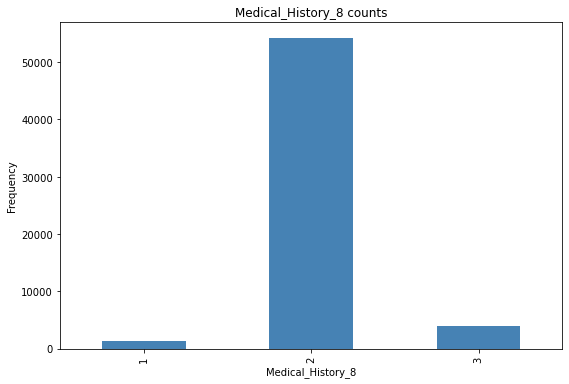

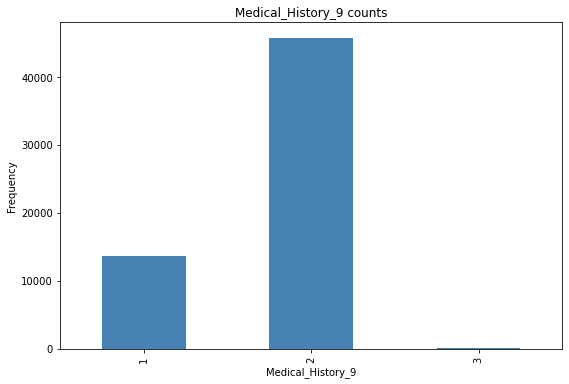

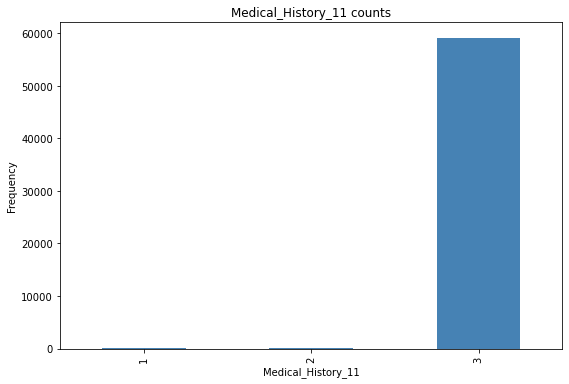

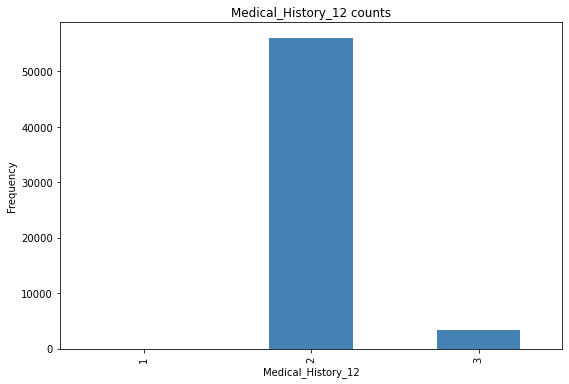

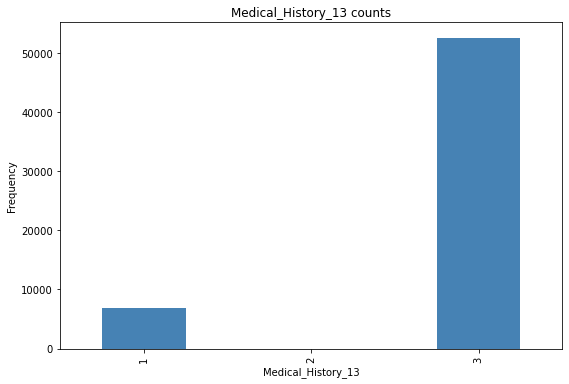

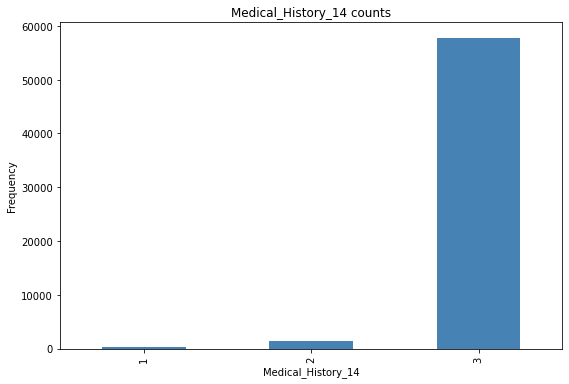

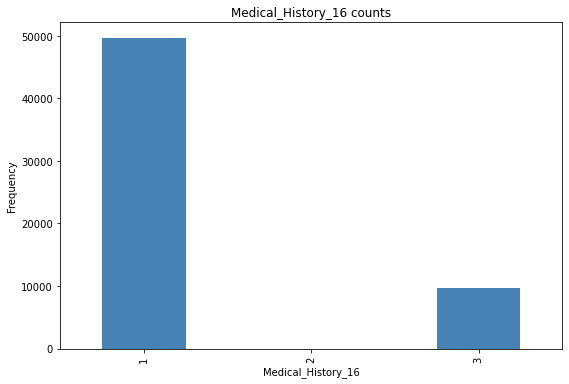

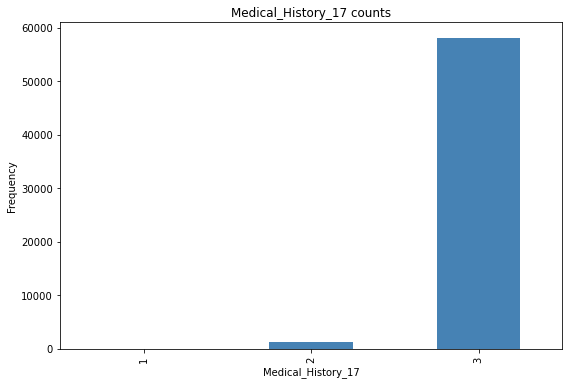

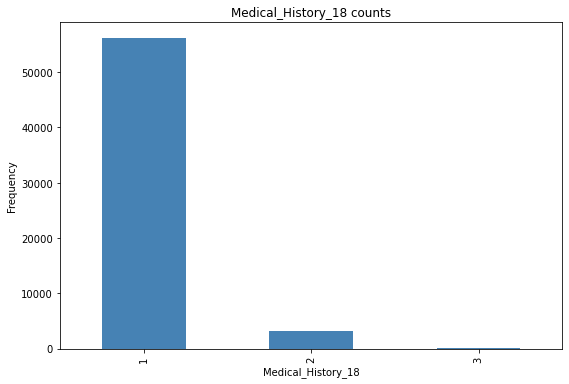

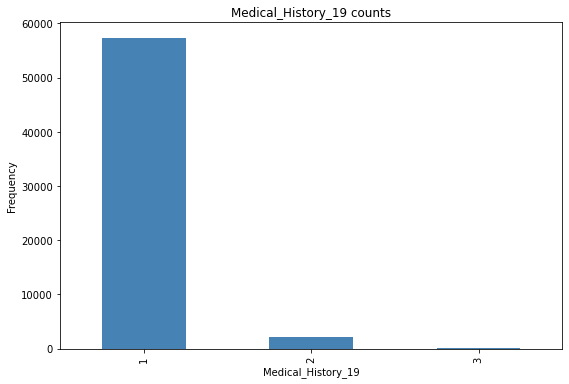

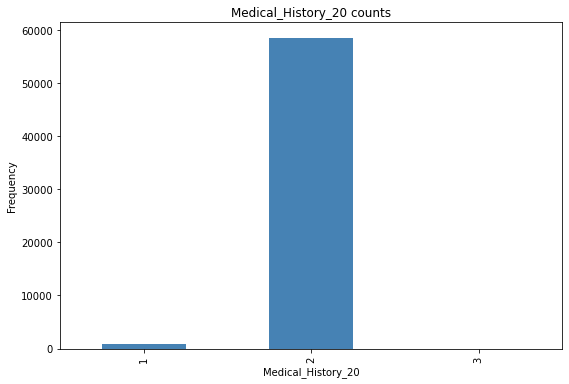

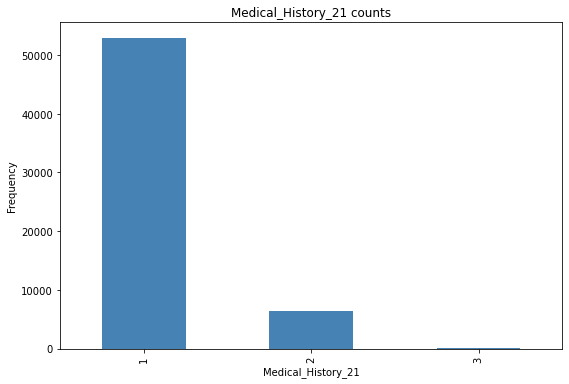

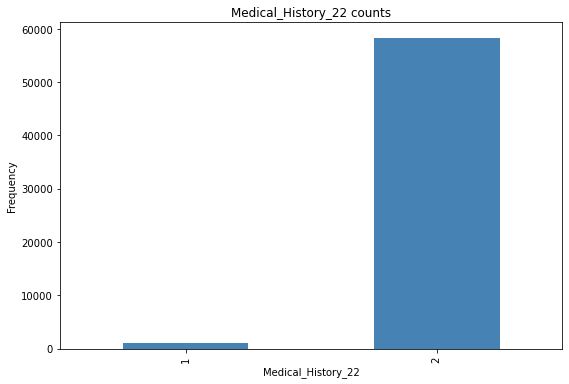

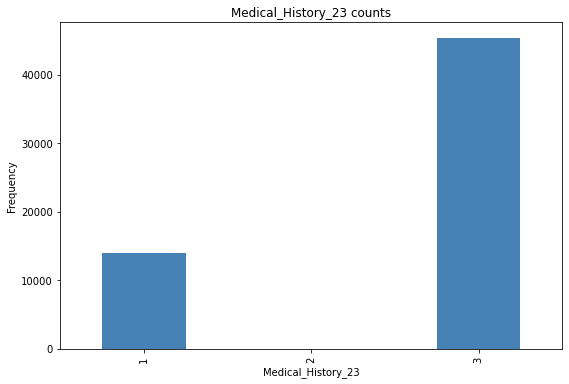

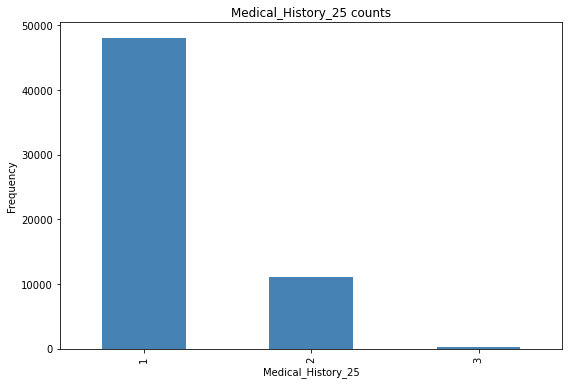

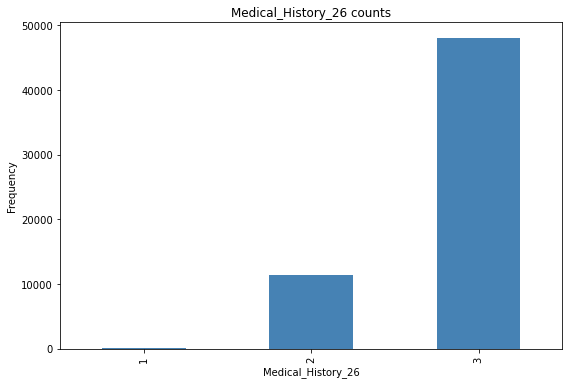

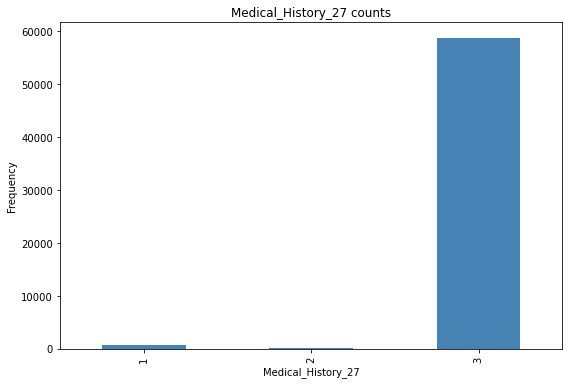

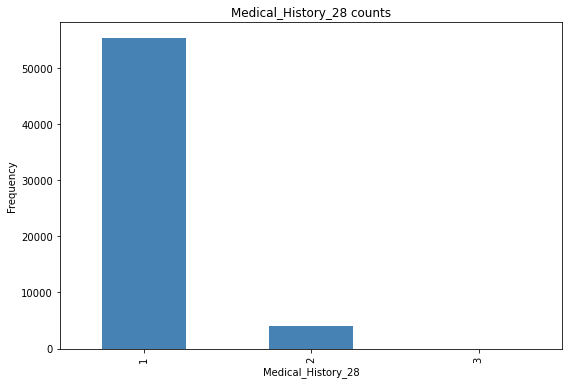

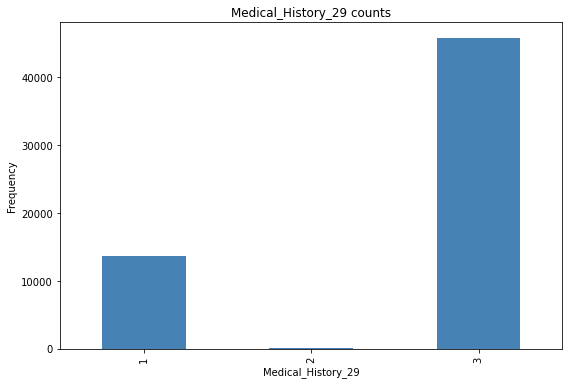

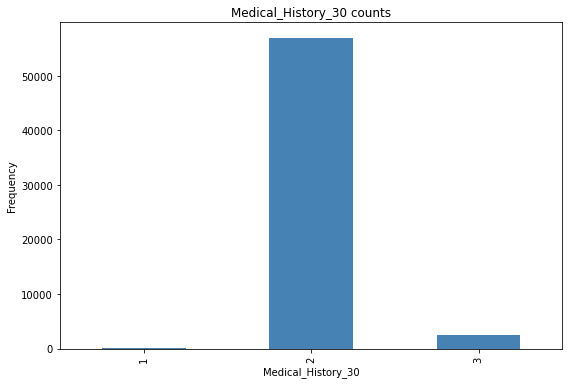

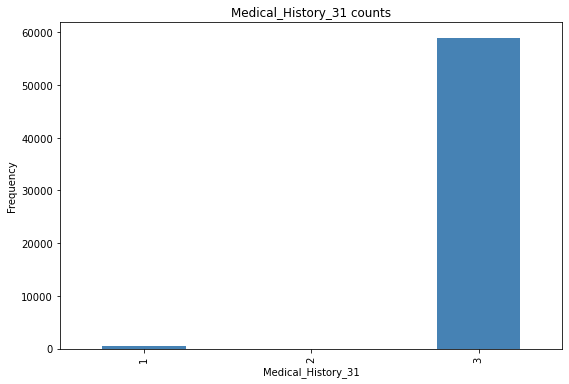

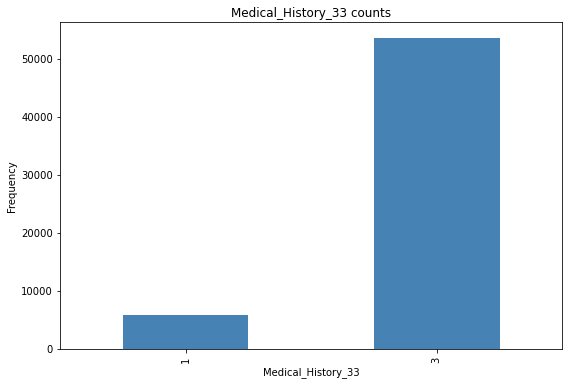

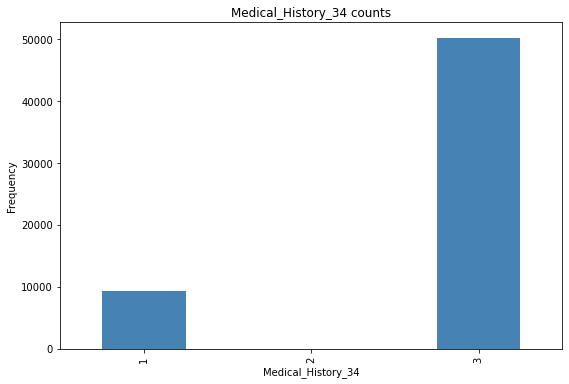

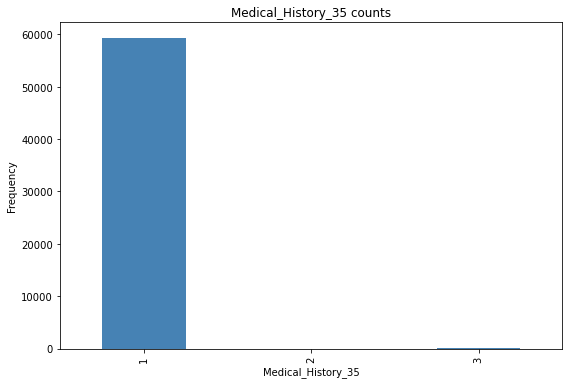

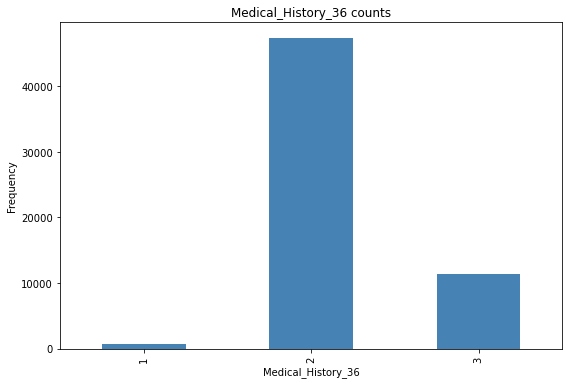

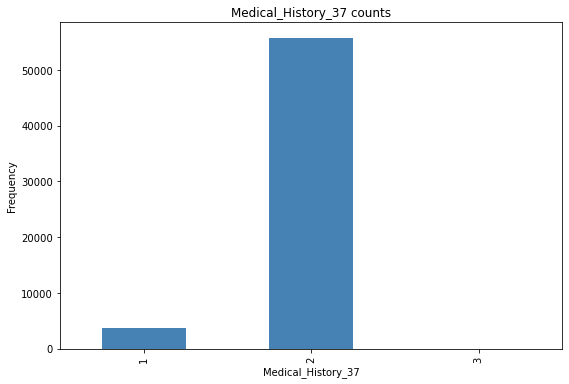

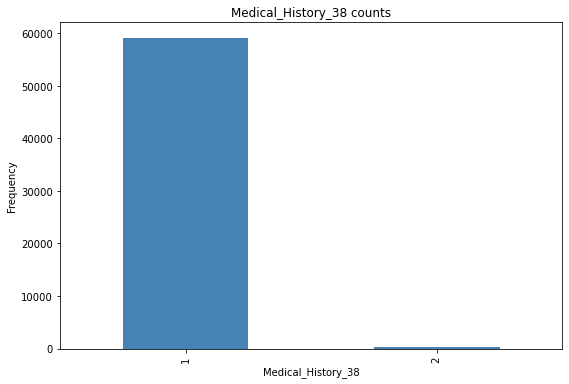

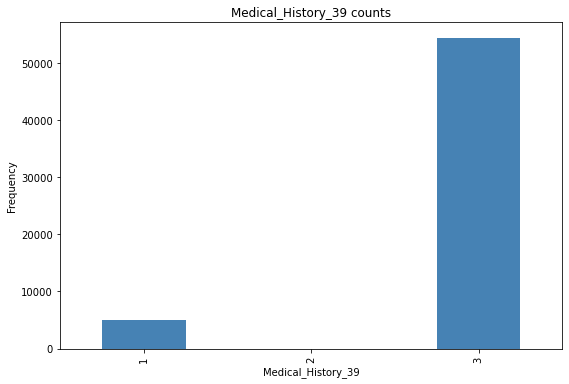

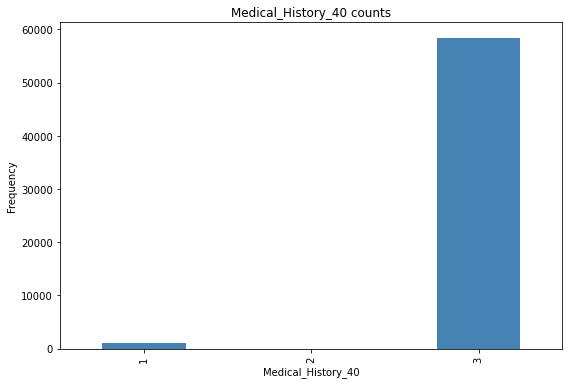

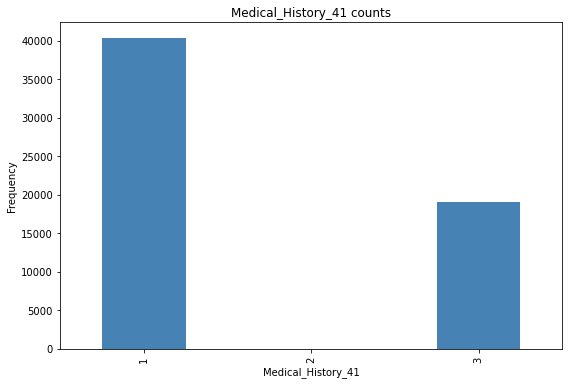

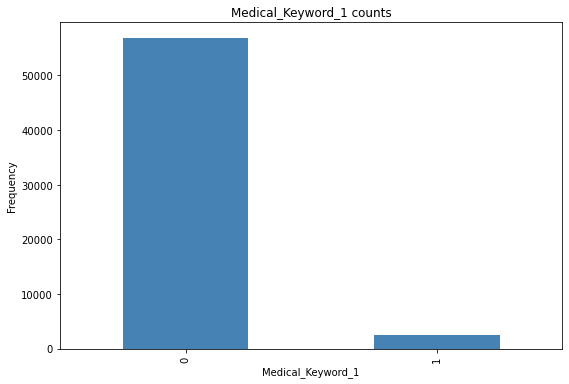

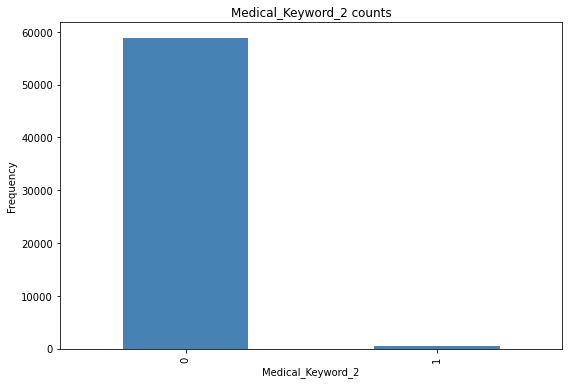

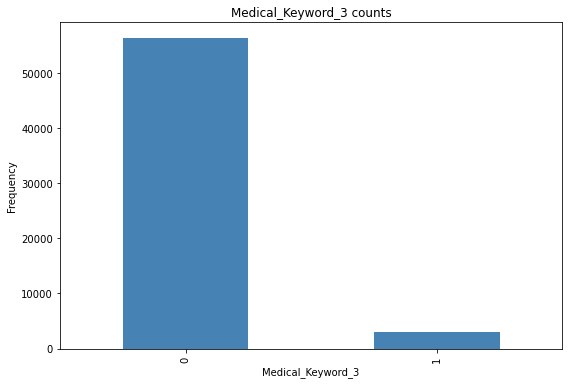

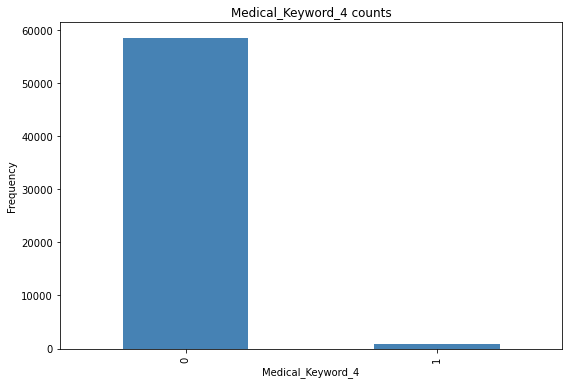

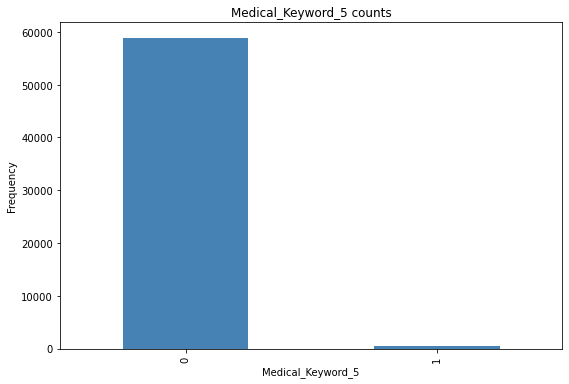

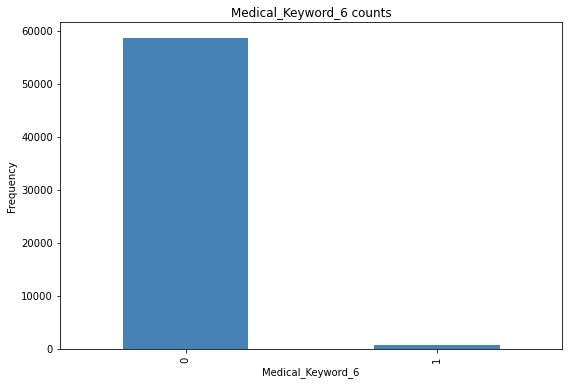

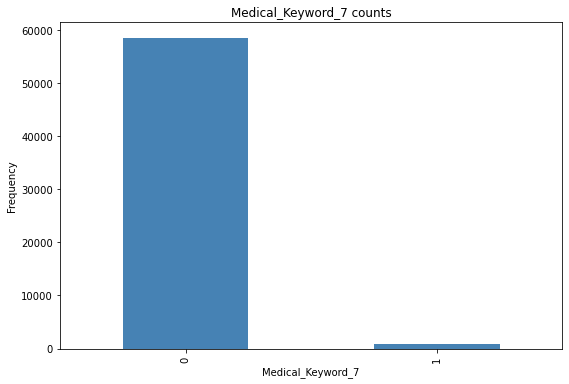

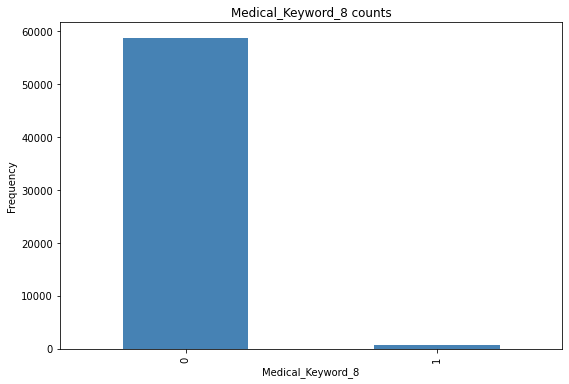

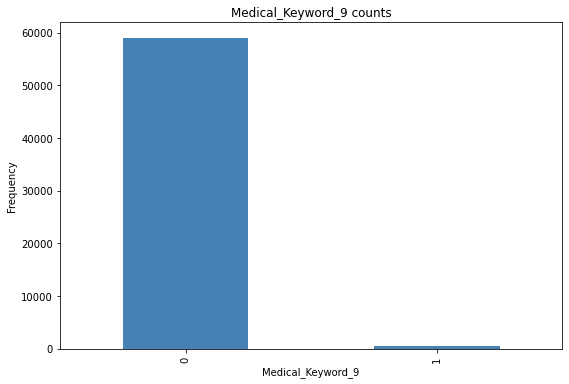

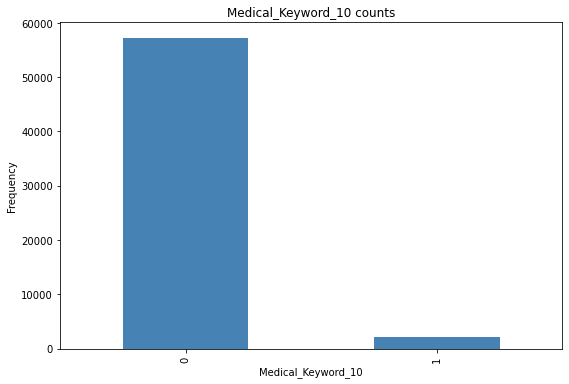

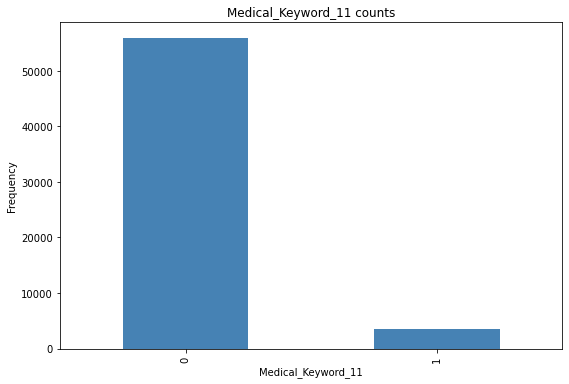

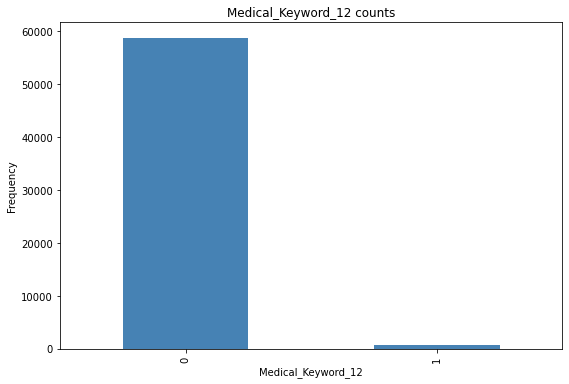

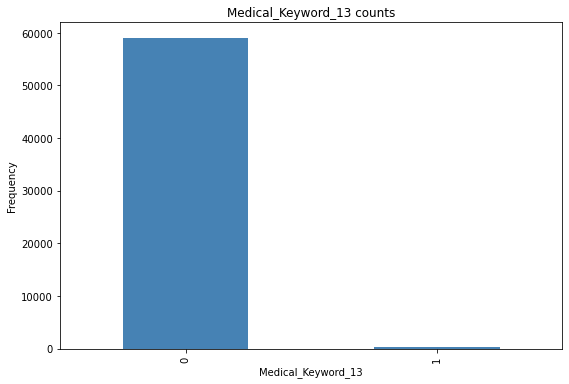

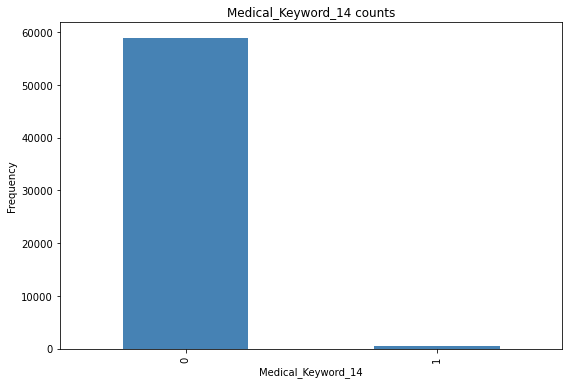

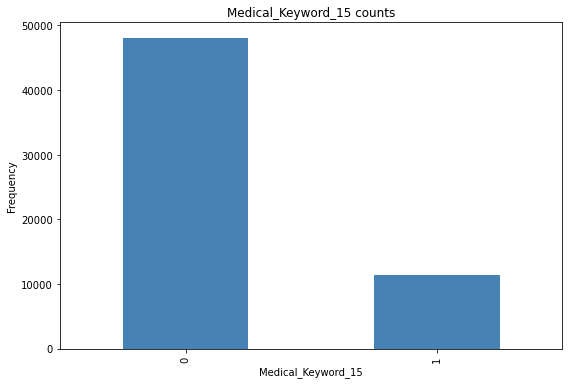

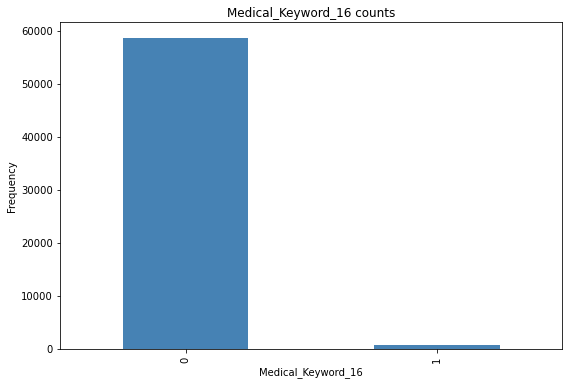

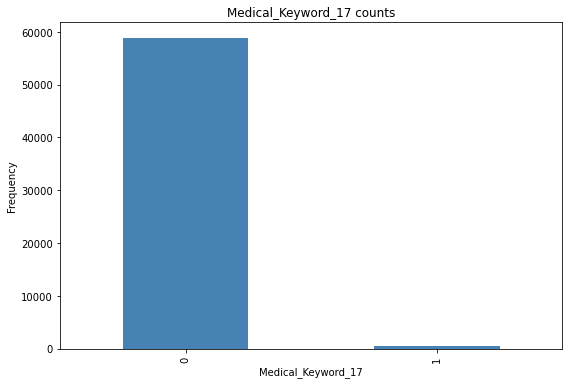

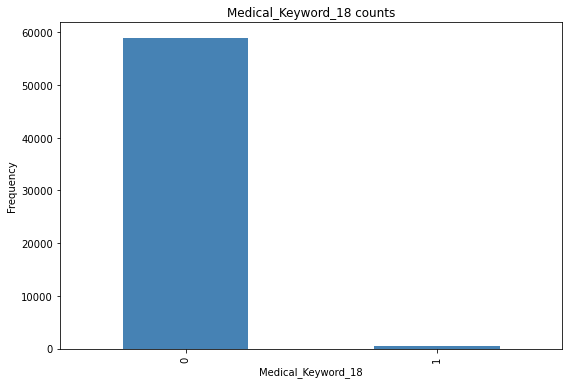

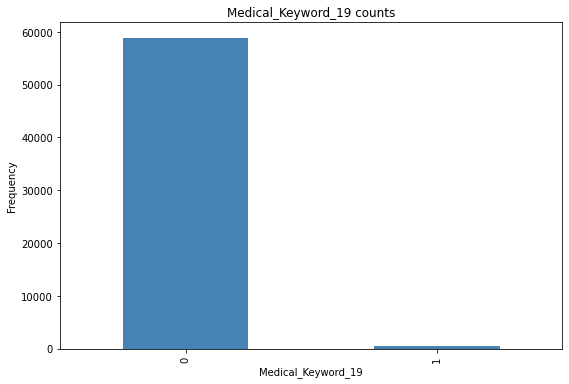

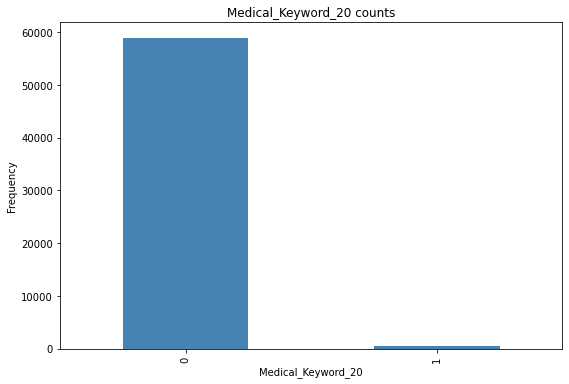

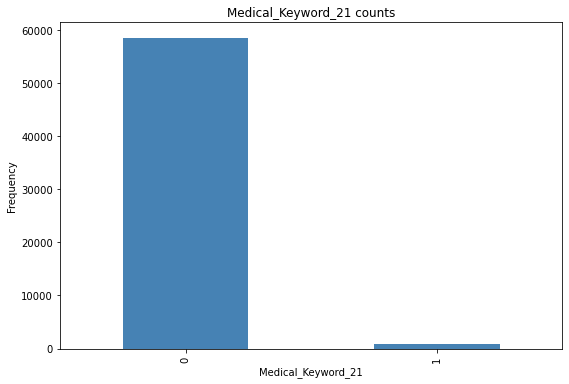

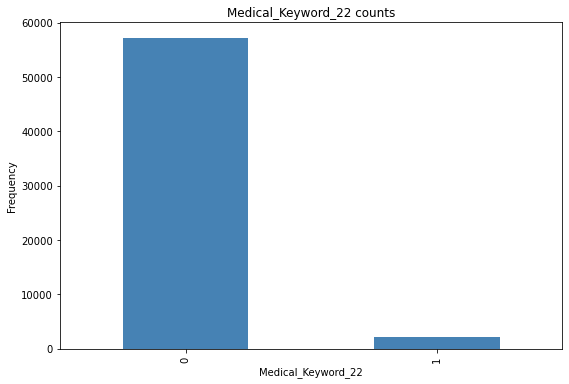

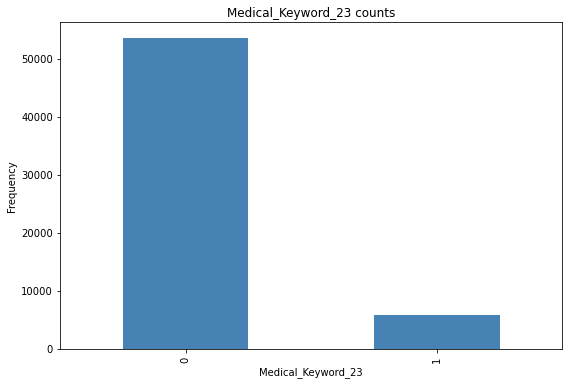

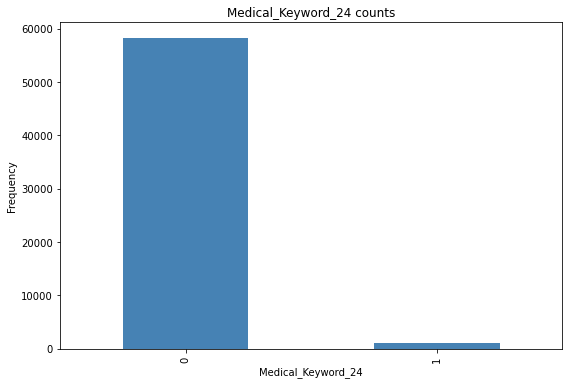

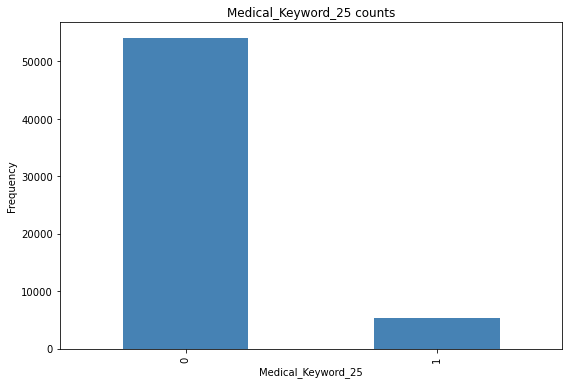

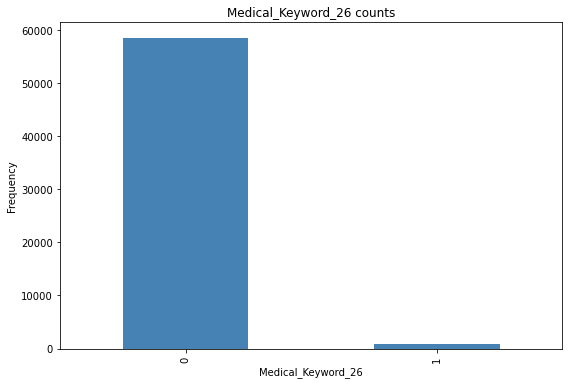

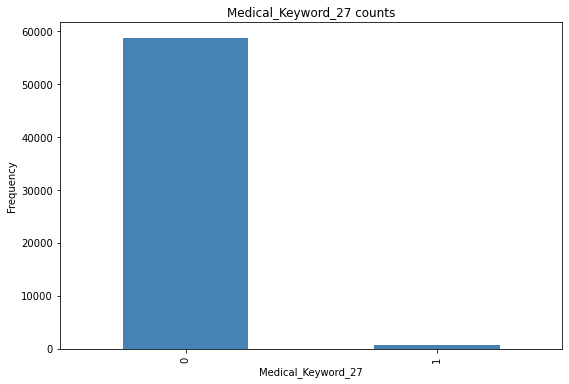

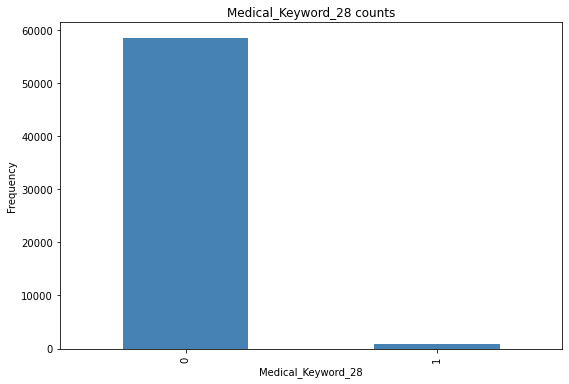

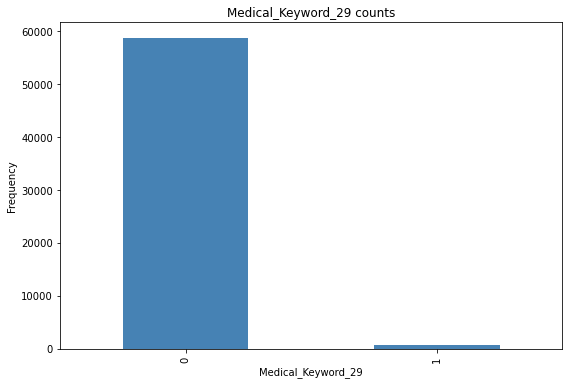

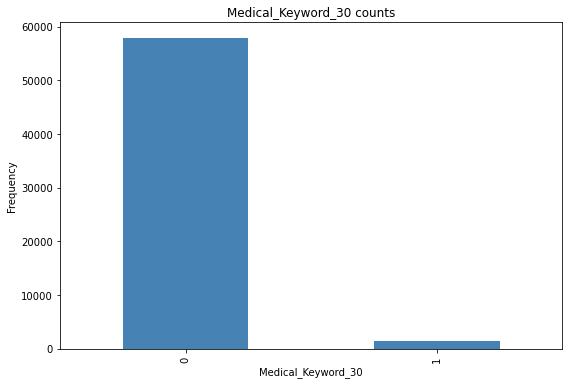

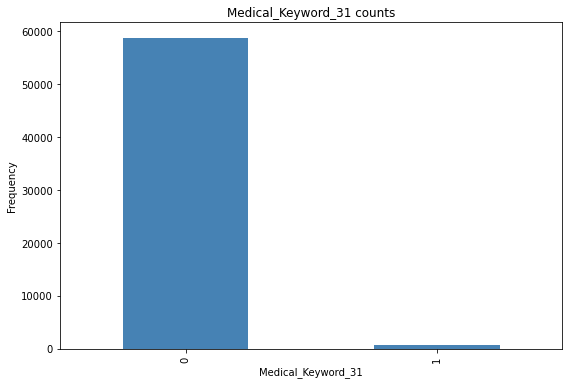

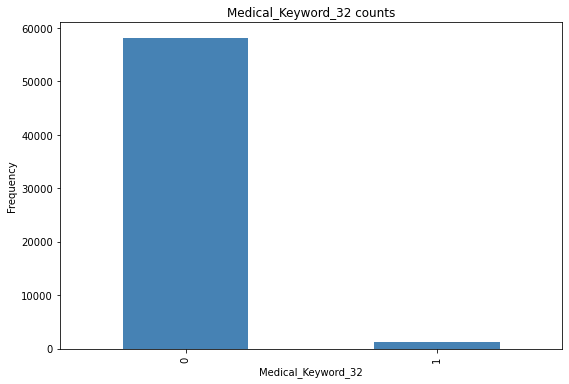

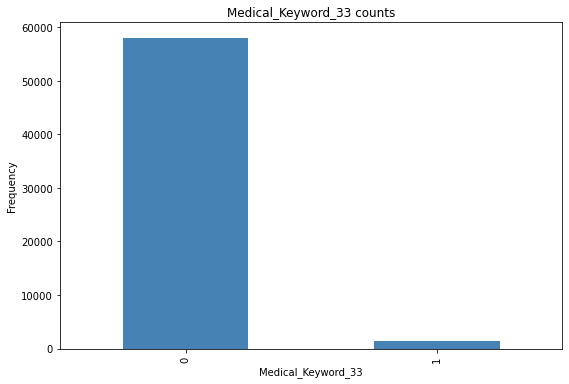

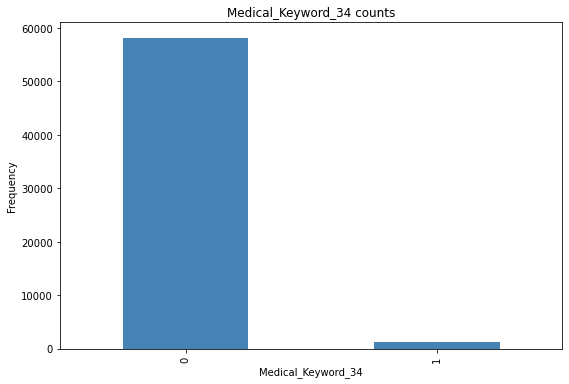

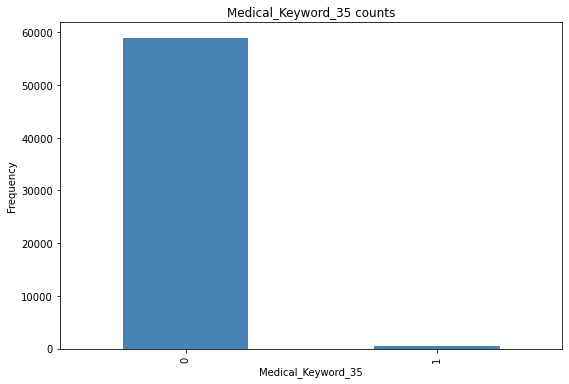

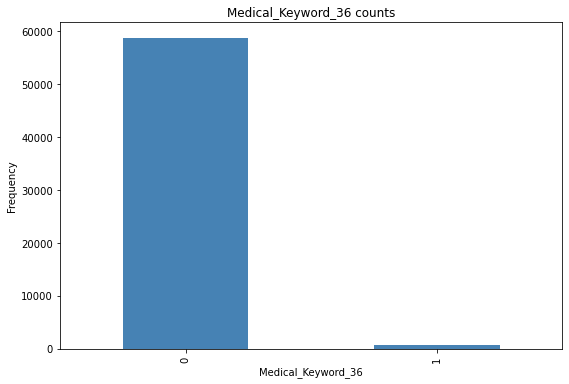

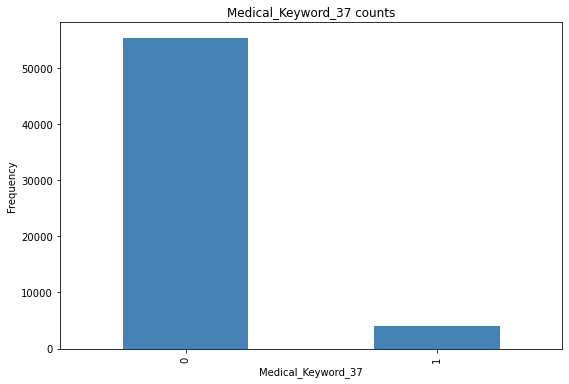

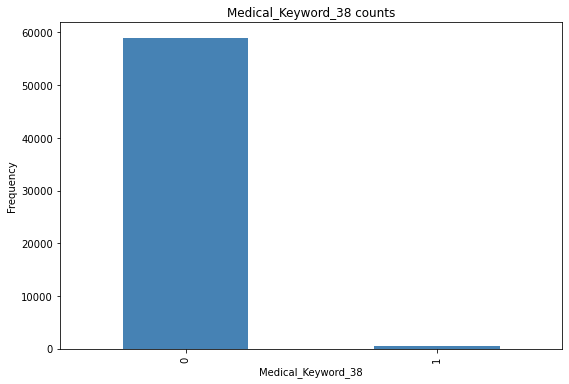

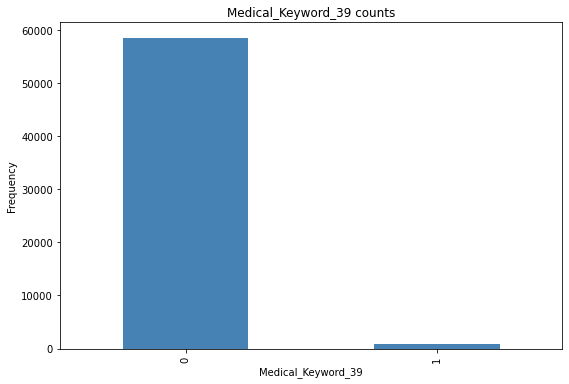

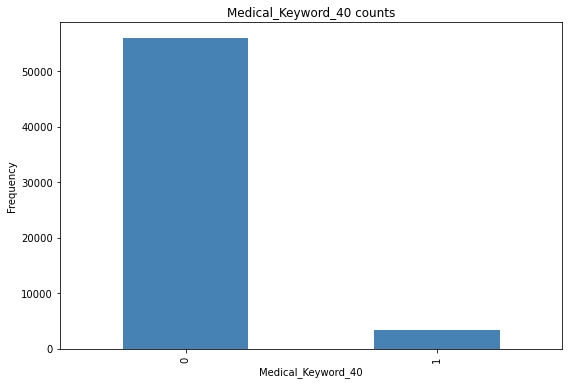

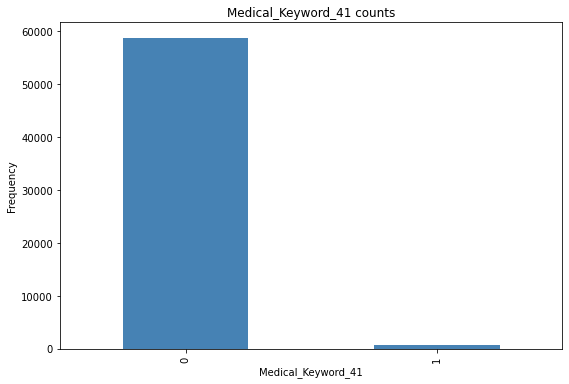

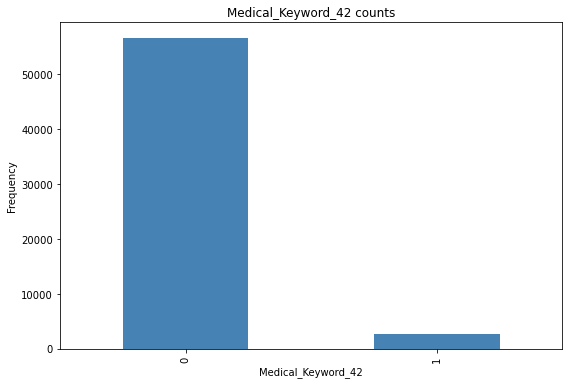

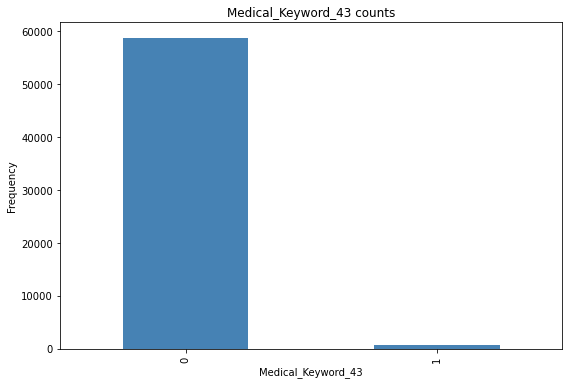

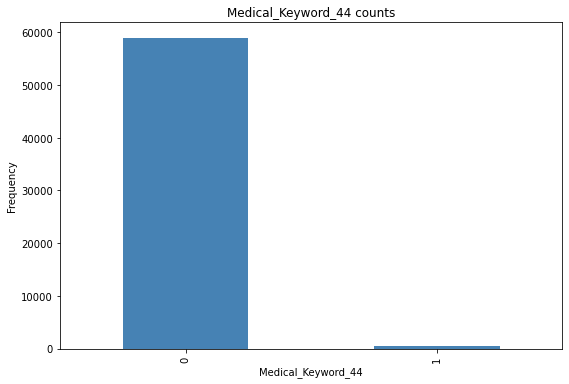

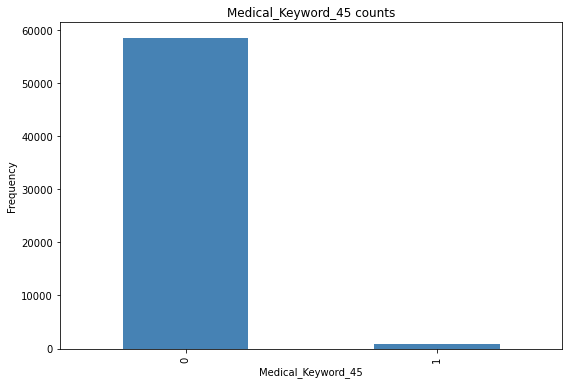

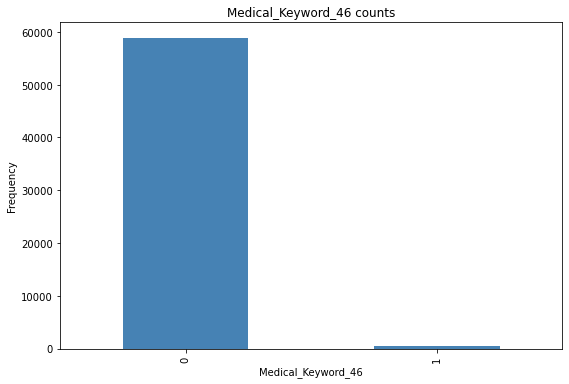

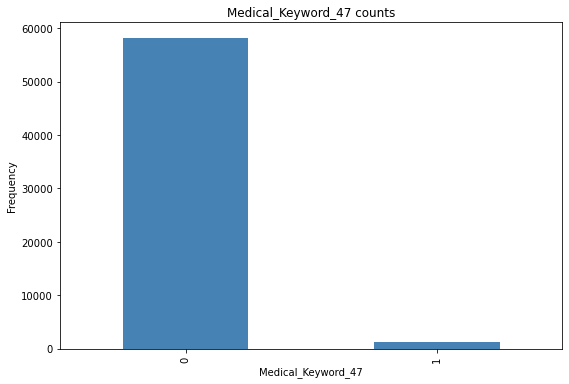

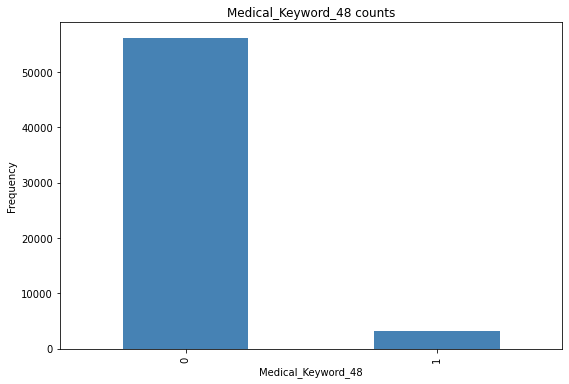

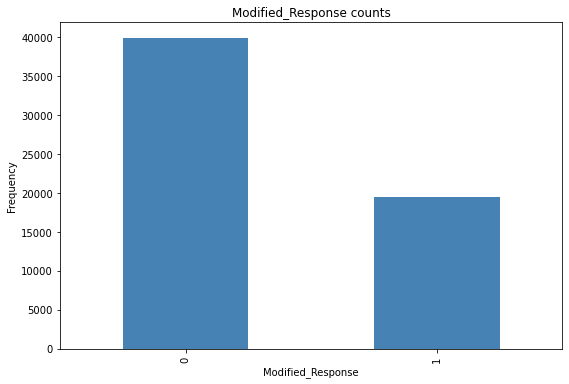

In [10]:
# Doing count plots for categorical
for col in categorical:
    counts = insurance_df[col].value_counts().sort_index()
    if len(counts) > 10 and len(counts) < 50 :
      fig = plt.figure(figsize=(30, 10))
    elif len(counts) >50 :
      continue
    else:
      fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()


C:\Users\SHRADDHA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Employment_Info_1'>

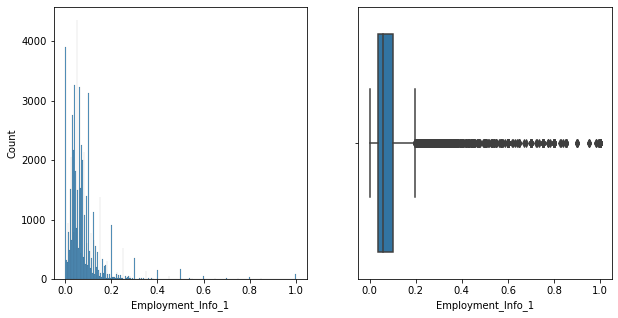

In [12]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.histplot(insurance_df['Employment_Info_1'], ax=axes[0])
sns.boxplot(insurance_df['Employment_Info_1'], ax=axes[1])

C:\Users\SHRADDHA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Employment_Info_4'>

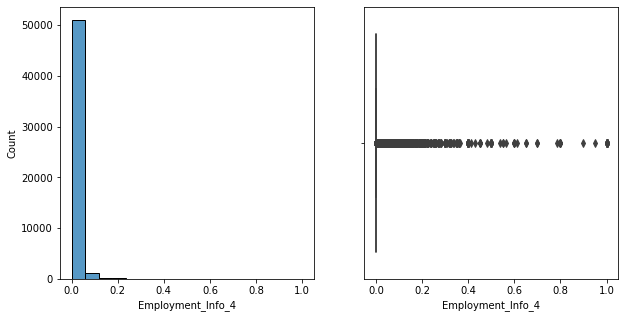

In [14]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.histplot(insurance_df['Employment_Info_4'], ax=axes[0])
sns.boxplot(insurance_df['Employment_Info_4'], ax=axes[1])


C:\Users\SHRADDHA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Employment_Info_6'>

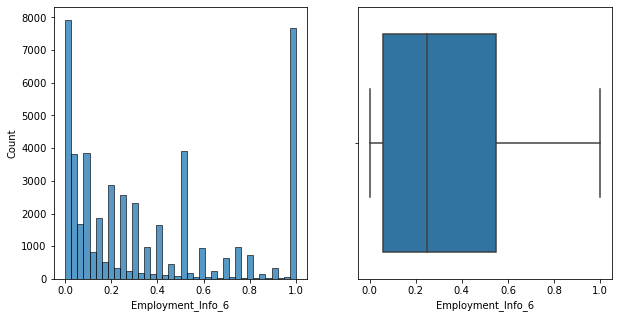

In [15]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.histplot(insurance_df['Employment_Info_6'], ax=axes[0])
sns.boxplot(insurance_df['Employment_Info_6'], ax=axes[1])


C:\Users\SHRADDHA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SHRADDHA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Family_Hist_4'>

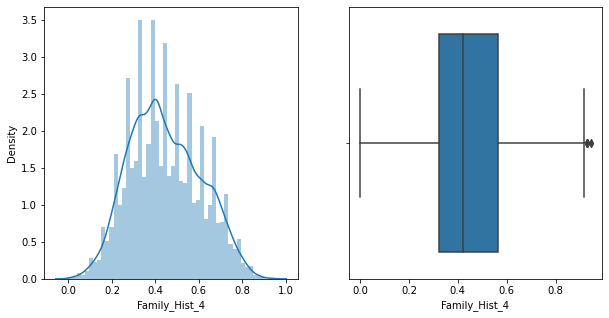

In [16]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(insurance_df['Family_Hist_4'], ax=axes[0])
sns.boxplot(insurance_df['Family_Hist_4'], ax=axes[1])

# Checking Correlation For Features greater than .8


In [17]:
# I just checked correlated feature with greater than .8 here 
corr = insurance_df.corr()
corr_greater_than_80 = corr[corr>=.8]
corr_greater_than_80


,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Modified_Response
Product_Info_1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Info_3,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Info_4,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Info_5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Info_6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Medical_Keyword_45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Medical_Keyword_46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Medical_Keyword_47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Medical_Keyword_48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


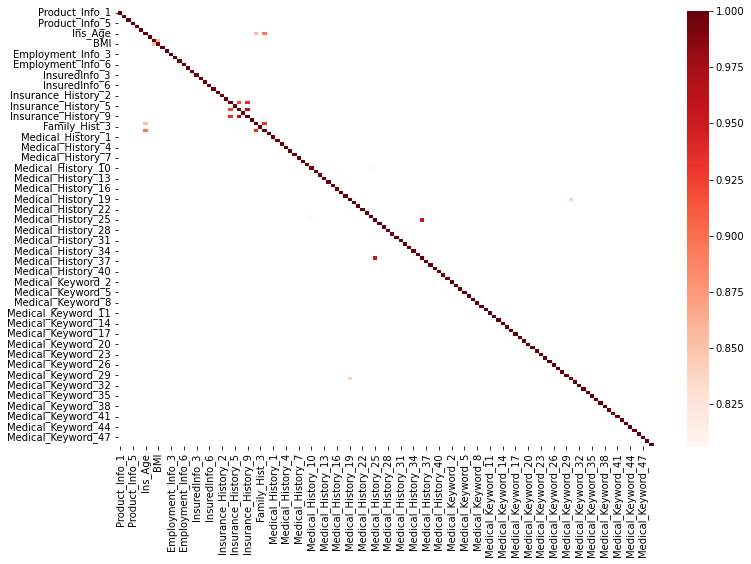

In [18]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_greater_than_80, cmap="Reds");

# CONCLUSION
BMI and Weight are highly correlated, which makes sense also as these 2 features are directly proprtional.

Ins_Age and Family_Hist_4, Family_Hist_2 highly correlated

Although, I am not going to perform any transformation on any feature or drop any as these are tree based models and they don't get affected by correlation much because of their non parametric nature.

In [19]:
#setting max columns to 200
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)


# Null Value Check

In [20]:
#checking percentage of missing values in a column
missing_val_count_by_column = insurance_df.isnull().sum()/len(insurance_df)

print(missing_val_count_by_column[missing_val_count_by_column > 0.4].sort_values(ascending=False))


Medical_History_10     0.990620
Medical_History_32     0.981358
Medical_History_24     0.935990
Medical_History_15     0.751015
Family_Hist_5          0.704114
Family_Hist_3          0.576632
Family_Hist_2          0.482579
Insurance_History_5    0.427679
dtype: float64


# Removing unimportant column


In [21]:
# Dropping all columns in which greater than 40 percent null values
insurance_df = insurance_df.dropna(thresh=insurance_df.shape[0]*0.4,how='all',axis=1)
# Does not contain important information
insurance_df.drop('Product_Info_2',axis=1,inplace=True)



# X and Y split


In [22]:
# Data for all the independent variables
X = insurance_df.drop(labels='Modified_Response',axis=1)

# Data for the dependent variable
Y = insurance_df['Modified_Response']


# Filling Remaining Missing Values


In [23]:
# Filling remaining missing values with mean
X = X.fillna(X.mean())


# Train Test Split


In [24]:
# Train-test split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.25, random_state=1)


# Shapes of Train and Test Data


In [25]:
# Check the shape of train dataset
print(X_train.shape,Y_train.shape)

# Check the shape of test dataset
print(X_test.shape, Y_test.shape)


(44535, 120) (44535,)
(14846, 120) (14846,)


# Some Important functions that I will be using throughout


In [26]:
# Utility Functions
def check_scores(model, X_train, X_test ):
  # Making predictions on train and test data

  train_class_preds = model.predict(X_train)
  test_class_preds = model.predict(X_test)


  # Get the probabilities on train and test
  train_preds = model.predict_proba(X_train)[:,1]
  test_preds = model.predict_proba(X_test)[:,1]


  # Calculating accuracy on train and test
  train_accuracy = accuracy_score(Y_train,train_class_preds)
  test_accuracy = accuracy_score(Y_test,test_class_preds)

  print("The accuracy on train dataset is", train_accuracy)
  print("The accuracy on test dataset is", test_accuracy)
  print()
  # Get the confusion matrices for train and test
  train_cm = confusion_matrix(Y_train,train_class_preds)
  test_cm = confusion_matrix(Y_test,test_class_preds )

  print('Train confusion matrix:')
  print( train_cm)
  print()
  print('Test confusion matrix:')
  print(test_cm)
  print()

  # Get the roc_auc score for train and test dataset
  train_auc = roc_auc_score(Y_train,train_preds)
  test_auc = roc_auc_score(Y_test,test_preds)

  print('ROC on train data:', train_auc)
  print('ROC on test data:', test_auc)
  
  # Fscore, precision and recall on test data
  f1 = f1_score(Y_test, test_class_preds)
  precision = precision_score(Y_test, test_class_preds)
  recall = recall_score(Y_test, test_class_preds) 
  
  
  #R2 score on train and test data
  train_log = log_loss(Y_train,train_preds)
  test_log = log_loss(Y_test, test_preds)

  print()
  print('Train log loss:', train_log)
  print('Test log loss:', test_log)
  print()
  print("F score is:",f1 )
  print("Precision is:",precision)
  print("Recall is:", recall)
  return model, train_auc, test_auc, train_accuracy, test_accuracy,f1, precision,recall, train_log, test_log


def check_importance(model, X_train):
  #Checking importance of features
  importances = model.feature_importances_
  
  #List of columns and their importances
  importance_dict = {'Feature' : list(X_train.columns),
                    'Feature Importance' : importances}
  #Creating a dataframe
  importance_df = pd.DataFrame(importance_dict)
  
  #Rounding it off to 2 digits as we might get exponential numbers
  importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)
  return importance_df.sort_values(by=['Feature Importance'],ascending=False)

def grid_search(model, parameters, X_train, Y_train):
  #Doing a grid
  grid = GridSearchCV(estimator=model,
                       param_grid = parameters,
                       cv = 2, verbose=2, scoring='roc_auc')
  #Fitting the grid 
  grid.fit(X_train,Y_train)
  print()
  print()
  # Best model found using grid search
  optimal_model = grid.best_estimator_
  print('Best parameters are: ')
  pprint( grid.best_params_)

  return optimal_model



# This function will show how a feature is pushing towards 0 or 1
def interpret_with_lime(model, X_test):
  # New data
  interpretor = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    mode='classification')
  

  exp = interpretor.explain_instance(
      data_row=X_test.iloc[10], 
      predict_fn=model.predict_proba
  )

  exp.show_in_notebook(show_table=True)

# This gives feature importance
def plot_feature_importance(model, X_train):
  # PLotting features vs their importance factors
  fig = plt.figure(figsize = (15, 8))
  
  # Extracting importance values
  values =check_importance(model, X_train)[check_importance(model, X_train)['Feature Importance']>0]['Feature Importance'].values
  
  
  # Extracting importance features
  features = check_importance(model, X_train)[check_importance(model, X_train)['Feature Importance']>0]['Feature'].values

  plt.bar(features, values, color ='blue',
          width = 0.4)
  plt.xticks( rotation='vertical')
  plt.show()

# Random Forest


In [27]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# Hyperparameter Grid
rf_parameters = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

pprint(rf_parameters)

#finding the best model
rf_optimal_model = grid_search(RandomForestClassifier(), rf_parameters, X_train, Y_train)


{'max_depth': [4, 6, 8],
 'min_samples_leaf': [40, 50],
 'min_samples_split': [50, 100, 150],
 'n_estimators': [50, 80, 100]}
Fitting 2 folds for each of 54 candidates, totalling 108 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=50; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=50; total time=   0.3s


In [31]:
# Getting scores from all the metrices
rf_model, rf_train_auc, rf_test_auc, rf_train_accuracy, rf_test_accuracy,rf_f1, rf_precision,rf_recall,rf_train_log, rf_test_log = check_scores(rf_optimal_model, X_train, X_test )


The accuracy on train dataset is 0.807320085326148
The accuracy on test dataset is 0.801697426916341

Train confusion matrix:
[[27323  2584]
 [ 5997  8631]]

Test confusion matrix:
[[9113  872]
 [2072 2789]]

ROC on train data: 0.8921355683065958
ROC on test data: 0.8853529007767977

Train log loss: 0.42925053624796927
Test log loss: 0.43387977135447897

F score is: 0.6545411875146679
Precision is: 0.761813712100519
Recall is: 0.5737502571487348


# Feature Importance For Random Forest


In [32]:
# Getting the feature importance for all the features
check_importance(rf_model, X_train)

,Feature,Feature Importance
9,BMI,0.25
8,Wt,0.17
55,Medical_History_23,0.11
38,Medical_History_4,0.09
86,Medical_Keyword_15,0.08
2,Product_Info_4,0.04
21,InsuredInfo_6,0.04
6,Ins_Age,0.03
74,Medical_Keyword_3,0.02
34,Family_Hist_4,0.02


# Plotting only those features which are contributing something

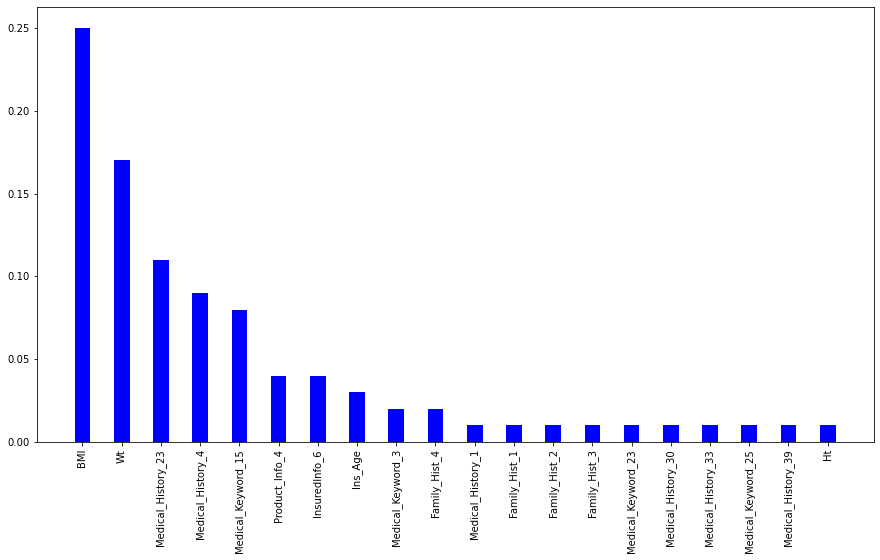

In [33]:
# PLotting only those features which are contributing something
plot_feature_importance(rf_model, X_train)

# CONCLUSION:
BMI, weight, Medical_History_23, Medical_History_4 and Medical_Keyword_15 seems to be important features according to random forest.

Also, only these features are contributing to the model prediction. Some features can be elmininated which are not contributing on further investigation

# GRADIENT BOOSTING


In [ ]:
#finding the best model
gb_parameters ={
    "n_estimators":[5,50,250],
    "max_depth":[1,3,5,7],
    "learning_rate":[0.01,0.1,1]
}

pprint(gb_parameters)

gb_optimal_model = grid_search(GradientBoostingClassifier(), gb_parameters, X_train, Y_train)



In [ ]:
# Getting the scpres for all the score metrics used here
gb_model, gb_train_auc, gb_test_auc, gb_train_accuracy, gb_test_accuracy,gb_f1, gb_precision,gb_recall,gb_train_log, gb_test_log = check_scores(gb_optimal_model, X_train, X_test 

In [ ]:
# Getting feature importance
check_importance(gb_model, X_train)

In [ ]:
# PLotting only those features which are contributing something
plot_feature_importance(gb_model, X_train)


# CONCLUSION:
BMI, weight, Medical_History_23, Medical_History_4 and Medical_Keyword_15 seems to be the most important 5 features according to Gradient boosting

# XGBOOST

In [ ]:
# Parameter grid for xgboost
xgb_parameters = {'max_depth': [1,3,5], 'n_estimators': [2,5,10], 'learning_rate': [.01 , .1, .5]}
print('XGB parameters areL:')
pprint(xgb_parameters)
#finding the best model
xgb_optimal_model = grid_search(XGBClassifier(), xgb_parameters, X_train, Y_train)

# LOGISTIC REGRESSION 

In [ ]:
# Parameter grid for Logistic Regression
solvers = ['lbfgs']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
lr_parameters = dict(solver=solvers,penalty=penalty,C=c_values)# define grid search

#finding the best model
lr_optimal_model = grid_search(LogisticRegression( max_iter=5000), lr_parameters, X_train, Y_train)


# MAXIMUM VOTING MODEL

In [ ]:
# Appending all the models to estimators list
estimators = []

estimators.append(('logistic', lr_optimal_model))
estimators.append(('XGB', xgb_optimal_model))
estimators.append(('GB', gb_optimal_model))
estimators.append(('rf', rf_optimal_model))

# create the voting model
voting_model = VotingClassifier(estimators, voting='soft')

voting_model.fit(X_train, Y_train)


# STACKED MODEL

In [ ]:
#Building a stacked classifier
stacked_classifier = StackingClassifier(classifiers =[lr_optimal_model, xgb_optimal_model, gb_model], meta_classifier = RandomForestClassifier(), use_probas = True, use_features_in_secondary = True)

# training of stacked model
stacked_model = stacked_classifier.fit(X_train, Y_train)   


# Final Results
Gradient Boosting, Voting Classifier and Stacked models are performing really well. Their train and test errors and also the roc scores and f scores are really close and good.